# Kelompok 6

Anggota:

1.   Vincent Revel Aldisa (205150200111019)
2.   Bagus Dermawan Mulya (205150201111016)
3.   Muhammad Haikal Fajri (205150207111016)



Sumber Dataset : https://www.kaggle.com/datasets/aprabowo/indonesia-tourism-destination

# Import

In [ ]:
!wget https://gist.githubusercontent.com/VincentRevel/4299105893a90d0b8ee9fdf7685964d3/raw/3fbd581fddcce5231fd38202b61fef67d6cb4dfd/tourism_with_id.csv
!wget https://gist.githubusercontent.com/VincentRevel/c31859fa518ebeb79d34d7a1783b8aa7/raw/01ad7946106b6a8daf74bcbc9b36148d2dee90c6/user.csv
!wget https://gist.githubusercontent.com/VincentRevel/3e8e937f7a9425295847277f70dbc236/raw/4fb21c870d9c952e8fbe2e8692d14ac9134e2079/tourism_rating.csv

--2022-06-21 06:12:22--  https://gist.githubusercontent.com/VincentRevel/4299105893a90d0b8ee9fdf7685964d3/raw/3fbd581fddcce5231fd38202b61fef67d6cb4dfd/tourism_with_id.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 365359 (357K) [text/plain]
Saving to: ‘tourism_with_id.csv.4’

tourism_with_id.csv 100%[===================>] 356.80K  --.-KB/s    in 0.03s   

2022-06-21 06:12:23 (10.4 MB/s) - ‘tourism_with_id.csv.4’ saved [365359/365359]

--2022-06-21 06:12:23--  https://gist.githubusercontent.com/VincentRevel/c31859fa518ebeb79d34d7a1783b8aa7/raw/01ad7946106b6a8daf74bcbc9b36148d2dee90c6/user.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to gist.githubusercontent

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid", palette="pastel")
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix 

In [ ]:
# Dataset
data = pd.read_csv('tourism_with_id.csv')
user = pd.read_csv('user.csv')
user_rating = pd.read_csv('tourism_rating.csv')
y = data['Rating']

In [ ]:
# Membuang Tabel Yang Bernilai NULL
data = data.drop(columns=['Unnamed: 11', 'Unnamed: 12'])
X = data

In [ ]:
# Tabel Feature
data.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Description   437 non-null    object 
 3   Category      437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    float64
 7   Time_Minutes  205 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-null    float64
 10  Long          437 non-null    float64
dtypes: float64(4), int64(2), object(5)
memory usage: 37.7+ KB


In [ ]:
# Tabel Label
y.head(len(y))

0      4.6
1      4.6
2      4.6
3      4.5
4      4.5
      ... 
432    4.4
433    4.6
434    4.4
435    4.6
436    4.8
Name: Rating, Length: 437, dtype: float64

# Exploratory Data Analysis (EDA)

### Distribusi rating/label

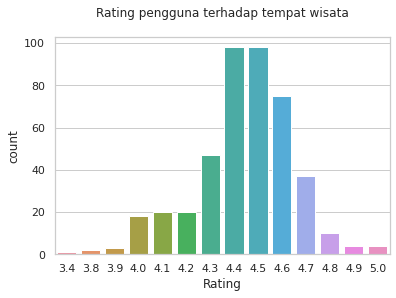

In [ ]:
sns.countplot(x='Rating', data=data)
plt.title('Rating pengguna terhadap tempat wisata', pad=20)
plt.show()

### Informasi mengenai jumlah tempat wisata

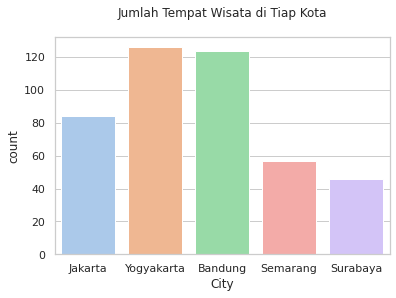

In [ ]:
sns.countplot(x='City', data=data)
plt.title('Jumlah Tempat Wisata di Tiap Kota', pad=20)
plt.show()

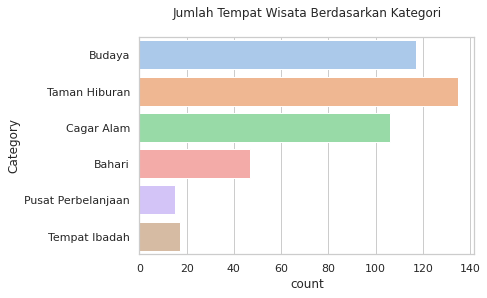

In [ ]:
sns.countplot(y='Category', data=data)
plt.title('Jumlah Tempat Wisata Berdasarkan Kategori', pad=20)
plt.show()

### Heatmap Hubungan antar fitur

Text(0.5, 1.0, 'Hubungan Antar Fitur')

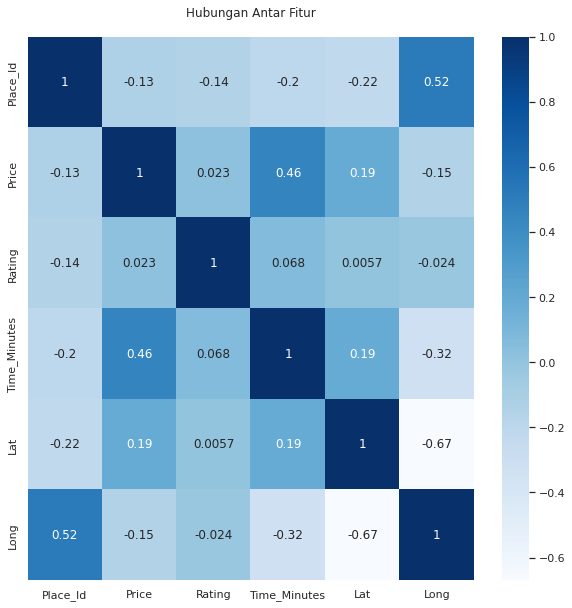

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),cbar=True,annot=True,cmap='Blues')
plt.title('Hubungan Antar Fitur', pad=20)

### Distribusi usia user yang memberikan rating

In [ ]:
import plotly.express as px
fig = px.box(data_frame=user, x=['Age'], title="Distribusi Usia User", width=600, height=400,)
fig.show()

### Distribusi Fitur

In [ ]:
import plotly.express as px
px.box(data_frame=data, x=['Price'], title="Distribusi Harga Masuk Tempat Wisata", width=600, height=400,)

In [ ]:
import plotly.express as px
px.box(data_frame=data, x=['Time_Minutes'], title="Distribusi Waktu Kunjungan Tempat Wisata", width=600, height=400,)

Distribusi harga tiket masuk dan waktu kunjungan tempat wisata terlalu tersebar. Oleh karena itu, nantinya saat proses preprocessing akan dilakukan normalisasi pada kolom "Price" dan "Time_Minutes".

### Heatmap Missing Value

Text(0.5, 1.0, 'Heatmap Missing Value')

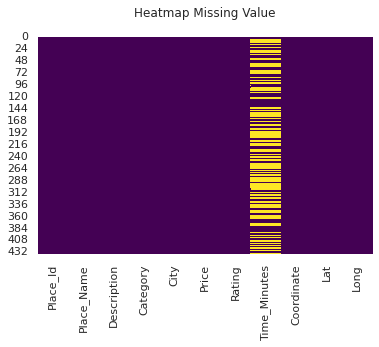

In [ ]:
sns.heatmap(data.isnull(),cbar=False,cmap='viridis')
plt.title('Heatmap Missing Value', pad=20)

Dari digaram yang dihasilkan, dapat dilihat bahwa fitur Time_Minutes memiliki beberapa missing value dikarenakan beberapa tempat wisata tidak membatasi waktu kunjungan untuk pengunjung. Oleh karena itu, nantinya pada proses preprocessing akan dilakukan penanganan missing value untuk kolom "Time_Minutes".

# Pre-Processing

#### Menghapus kolom yang tidak digunakan  

In [ ]:
X = X.drop(columns=['Place_Id', 'Place_Name', 'Rating', 'Description', 'Coordinate', 'Lat', 'Long'])
X.head()

,Category,City,Price,Time_Minutes
0,Budaya,Jakarta,20000,15.0
1,Budaya,Jakarta,0,90.0
2,Taman Hiburan,Jakarta,270000,360.0
3,Taman Hiburan,Jakarta,10000,NaN
4,Taman Hiburan,Jakarta,94000,60.0


#### Mengubah kolom nilainya bersifat kategorik menggunakan LabelEncoder dari library scikit-learn

In [ ]:
# Mengambil kolom yang bersifat kategorik (Category dan City)
object_clm = X.select_dtypes(include=[object])
object_clm.head()

,Category,City
0,Budaya,Jakarta
1,Budaya,Jakarta
2,Taman Hiburan,Jakarta
3,Taman Hiburan,Jakarta
4,Taman Hiburan,Jakarta


In [ ]:
# Penerapan LabelEncoder pada kolom yang sudah diambil
le = preprocessing.LabelEncoder()
encode = object_clm.apply(le.fit_transform)
encode.head()

,Category,City
0,1,1
1,1,1
2,4,1
3,4,1
4,4,1


In [ ]:
# Menggabungkan hasil proses LabelEncoder kembali ke dataframe X
X = X.drop(columns=['Category', 'City'])
X = pd.concat([X, encode], axis = 1)
X.head()

,Price,Time_Minutes,Category,City
0,20000,15.0,1,1
1,0,90.0,1,1
2,270000,360.0,4,1
3,10000,NaN,4,1
4,94000,60.0,4,1


#### Penanganan missing value

In [ ]:
# Pengecekan missing value dataframe X
X.isna().sum()

Price             0
Time_Minutes    232
Category          0
City              0
dtype: int64

In [ ]:
# Pengecekan missing value dataframe y
y.isna().sum()

0

Penanganan missin value dilakukan karena terdapat kolom yang memiliki nilai missing value terlalu besar, yakni 232 baris data pada kolom "Time_minutes". Missing value diganti dengan nilai rata-rata dari data pada kolom tersebut.

In [ ]:
# Penanganan missing value menggunakan Simpleimputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X.iloc[:,1:2] = imputer.fit_transform(X[["Time_Minutes"]])
X.head()

,Price,Time_Minutes,Category,City
0,20000,15.000000,1,1
1,0,90.000000,1,1
2,270000,360.000000,4,1
3,10000,82.609756,4,1
4,94000,60.000000,4,1


In [ ]:
# Pengecekan ulang missing value
X.isna().sum()

Price           0
Time_Minutes    0
Category        0
City            0
dtype: int64

#### Normalisasi menggunakan MinMaxScaler dari library scikit-learn

Normalisasi dilakukan karena data pada beberapa kolom fitur memiliki rentang nilai yang besar, seperti yang sudah ditampilkan pada bagian Exploratory Data Analysis.

In [ ]:
scaler = preprocessing.MinMaxScaler()
X.iloc[:,:2] = scaler.fit_transform(X.iloc[:,:2])

In [ ]:
# Data setelah diterapkan Normalisasi pada kolom Price dan Time Minutes
X.head()

,Price,Time_Minutes,Category,City
0,0.022222,0.014286,1,1
1,0.000000,0.228571,1,1
2,0.300000,1.000000,4,1
3,0.011111,0.207456,4,1
4,0.104444,0.142857,4,1


# Pembagian data latih dan data uji

Data label harus dibulatkan terlebih dahulu agar dapat diproses pada penerapan model.

In [ ]:
y = y.round()

Data semula (Fitur dan Label) masing-masing dibagi menjadi 2 bagian, yakni:
- X_train : Data Latih
- X_test  : Data Uji
- y_train : Label Latih
- y_test : Label Uji

Pembagian data ini menggunakan train_test_split dari library scikit-learn dengan pembagian 80% data latih dan 20% data uji.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

Merapikan index pada setiap data yang sudah dibagi.

In [ ]:
X_train = X_train.reset_index(drop=True)
X_train.head(len(X_train))

,Price,Time_Minutes,Category,City
0,0.000000,0.207456,2,0
1,0.000000,0.057143,2,3
2,0.000000,0.207456,1,1
3,0.006667,0.314286,4,4
4,0.011111,0.207456,2,0
...,...,...,...,...
344,0.005556,0.207456,1,4
345,0.000000,0.100000,4,0
346,0.005556,0.228571,2,2
347,0.000000,0.207456,4,3


In [ ]:
X_test = X_test.reset_index(drop=True)
X_test.head(len(X_test))

,Price,Time_Minutes,Category,City
0,0.016667,0.057143,1,3
1,0.000000,0.057143,4,1
2,0.000000,0.207456,5,0
3,0.166667,0.207456,2,0
4,0.011111,0.207456,2,0
...,...,...,...,...
83,0.000000,0.100000,4,1
84,0.022222,0.314286,4,4
85,0.000000,0.100000,3,1
86,0.002222,0.207456,1,1


In [ ]:
y_train = y_train.reset_index(drop=True)
y_train.head(len(y_train))

0      4.0
1      4.0
2      4.0
3      4.0
4      4.0
      ... 
344    5.0
345    4.0
346    4.0
347    5.0
348    5.0
Name: Rating, Length: 349, dtype: float64

In [ ]:
y_test = y_test.reset_index(drop=True)
y_test.head(len(y_test))

0     4.0
1     5.0
2     5.0
3     5.0
4     4.0
     ... 
83    4.0
84    4.0
85    4.0
86    5.0
87    4.0
Name: Rating, Length: 88, dtype: float64

# Implementasi Model

## Decision Tree

Penerapan algoritma Decision Tree menggunakan DecisionTreeClassifier dari library scikit-learn pada data yang sudah disiapkan.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc = dtc.fit(X_train,y_train)

In [ ]:
dtc.tree_.max_depth

15

Max depth adalah jarak maksimum antara *root* dengan *leaf* apa pun.

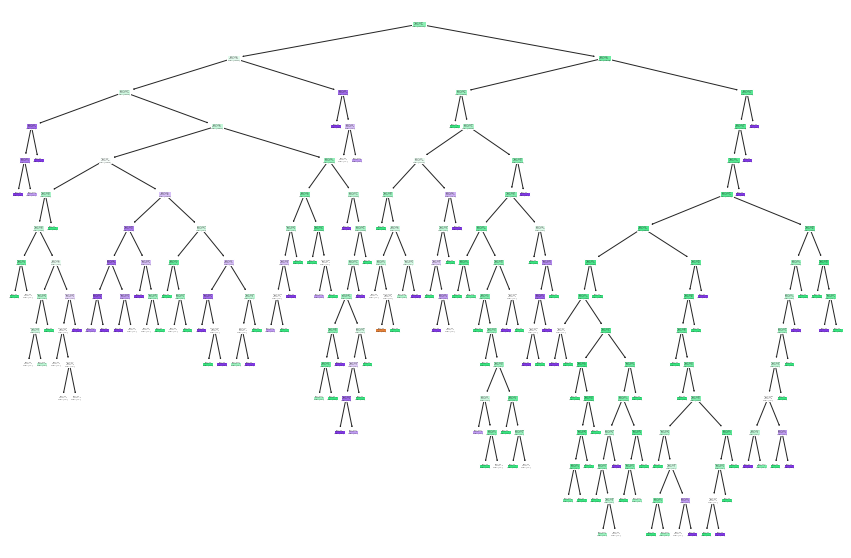

In [ ]:
plt.figure(figsize=(15,10))
plot_tree(DecisionTreeClassifier().fit(X_train, y_train), filled = True)
plt.show()

Gambar diatas merupakan visualisasi Tree yang sudah ditrain menggunakan max_depth 15, data latih, data uji, dan klasifikasi dari library scikit-learn.

In [ ]:
y_pred = dtc.predict(X_test)
print("Hasil Akurasi Menggunakan Decision Tree : ", accuracy_score(y_test, y_pred))

Hasil Akurasi Menggunakan Decision Tree :  0.7272727272727273


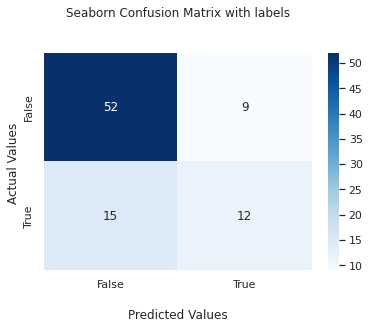

In [ ]:
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

Berdasarkan confusion matrix, didapatkan nilai TP = 52, FN = 9, FP = 15, dan TN = 12.

### Hyperparameter

In [ ]:
param_grid = {"max_depth": [3, None],
              "min_samples_leaf": np.arange(1,9),
              "criterion": ["gini", "entropy"]}

param_grid merupakan *dictionary* yang menyimpan parameter-parameter yang dapat diterapkan saat implementasi model dan mencari nilai *hyperparameter*

In [ ]:
grid_tree = GridSearchCV(dtc,param_grid,cv=5,refit=True,verbose=2)
grid_tree.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=3; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_s

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=7; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=7; total time=   0.0s
[CV] END ....criterion=gini,

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, None],
                         'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8])},
             verbose=2)

In [ ]:
print(grid_tree.best_estimator_)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=2)


In [ ]:
grid_predictions = grid_tree.predict(X_test)

Dengan menggunakan GridSearchCV dari library scikit-learn, didapatkan hyperparameter untuk Decision Tree adalah max_depth=3 dan min_samples_leaf=2.

### Evaluasi

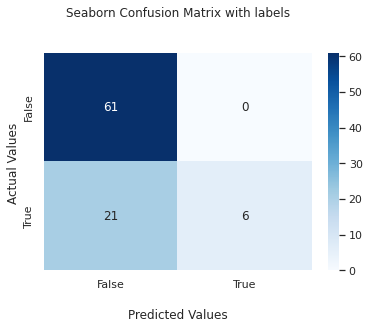

In [ ]:
ax = sns.heatmap(confusion_matrix(y_test, grid_predictions), annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

Berdasarkan confusion matrix, didapatkan nilai TP = 61, FN = 0, FP = 21, dan TN = 6.

In [ ]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

         4.0       0.74      1.00      0.85        61
         5.0       1.00      0.22      0.36        27

    accuracy                           0.76        88
   macro avg       0.87      0.61      0.61        88
weighted avg       0.82      0.76      0.70        88



Model dijalankan kembali dengan hyperparameter yang sudah didapatkan. Hasil yang didapatkan dapat dilihat dari classification_report diatas.

## Support Vector Machine (SVM)

Penerapan algoritma SVM menggunakan SVC dari library scikit-learn pada data yang sudah disiapkan.

In [ ]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [ ]:
y_pred = svm.predict(X_test)
print("Hasil Akurasi SVM : ", accuracy_score(y_test, y_pred))

Hasil Akurasi SVM :  0.6931818181818182


Hasil akurasi yang didapatkan dari dataset yang sudah dimasukkan ke dalam algoritma dengan parameter kosong adalah 0.69


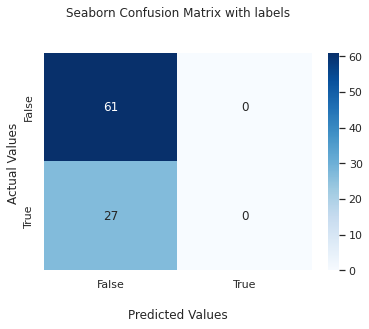

In [ ]:
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

Berdasarkan confusion matrix, didapatkan nilai TP = 61, FN = 0, FP = 27, dan TN = 0.

### Hyperparameter

In [ ]:
param_grid = {'C': [0.1,1, 10, 100], 
              'gamma': [1,0.1,0.01,0.001],
              'kernel': ['rbf', 'poly', 'sigmoid']
              }

param_grid merupakan *dictionary* yang menyimpan parameter-parameter yang dapat diterapkan saat implementasi model dan mencari nilai *hyperparameter*

In [ ]:
grid = GridSearchCV(SVC(),param_grid,cv=5,refit=True,verbose=2)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   1.2s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   1.8s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.4s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.5s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.6s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

In [ ]:
print(grid.best_estimator_)

SVC(C=100, gamma=1)


In [ ]:
grid_predictions = grid.predict(X_test)

### Evaluasi

Dengan menggunakan GridSearchCV dari library scikit-learn, didapatkan hyperparameter untuk SVm adalah C=100 dan gamma=1.

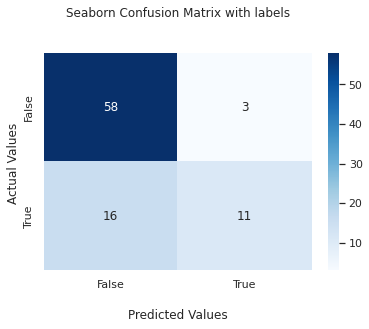

In [ ]:
ax = sns.heatmap(confusion_matrix(y_test, grid_predictions), annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

Berdasarkan confusion matrix, didapatkan nilai TP = 58, FP = 3, FN = 16, dan TP = 11.

In [ ]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

         4.0       0.78      0.95      0.86        61
         5.0       0.79      0.41      0.54        27

    accuracy                           0.78        88
   macro avg       0.78      0.68      0.70        88
weighted avg       0.78      0.78      0.76        88



Model dijalankan kembali dengan hyperparameter yang sudah didapatkan. Hasil yang didapatkan dapat dilihat dari classification_report diatas.

# Hasil

Dari hasil implementasi model, didapatkan algoritma SVM dengan akurasi tertinggi (0.78). Oleh karena itu, untuk mendapatkan urutan fitur paling berpengaruh terhadap label, klasifikasi yang digunakan adalah svm dengan parameter hyperparameter.

Text(0, 0.5, 'Permutation Importance')

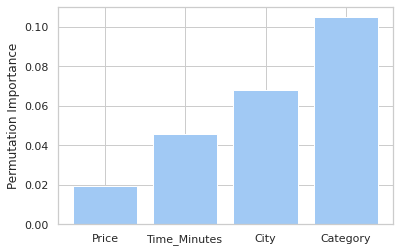

In [ ]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(grid, X_train, y_train)


feature_names = X_test.columns
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.bar(features[sorted_idx], np.abs(perm_importance.importances_mean[sorted_idx]))
plt.ylabel("Permutation Importance")

Permutation Importance konsepnya adalah mengacak nilai dalam satu kolom, lalu dibuat prediksi menggunakan klasifikasi SVM. Berdasarkan hasil prediksi tersebut, nilai penurunan kinerja kolom dihitung berdasarkan perbandingan dengan data kolom sebelum diacak. Hasil akhir Permutation Importance ini adalah nilai numerik yang semakin tinggi, berarti semakin berpengaruh fitur tersebut terhadap label. Berdasarkan hasil permutation importance, urutan fitur paling berpengaruh terhadap label adalah dari yang tertinggi Category, City, Time_Minutes, dan Price.